In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Bitcoin_tweets.csv')


F:\Applications\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [84]:
import re
import matplotlib.pyplot as plt

In [154]:
prices = pd.read_csv('BTC-USD.csv')

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [4]:
type(df['date'].iloc[0])

str

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339177 entries, 0 to 2339176
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_name         object 
 1   user_location     object 
 2   user_description  object 
 3   user_created      object 
 4   user_followers    float64
 5   user_friends      object 
 6   user_favourites   object 
 7   user_verified     object 
 8   date              object 
 9   text              object 
 10  hashtags          object 
 11  source            object 
 12  is_retweet        object 
dtypes: float64(1), object(12)
memory usage: 232.0+ MB


In [54]:
print(df.date.isna().sum())
df = df.dropna(axis=0,subset=['date'])
print(df.date.isna().sum())
df.count()

0
0


user_name           2339083
user_location       1205233
user_description    2058148
user_created        2339114
user_followers      2339114
user_friends        2339114
user_favourites     2339114
user_verified       2339114
date                2339114
text                2339114
hashtags            2322105
source              2335537
is_retweet          2338851
datetime            2339114
dtype: int64

In [132]:
regex = '\d{4}\\-\d\d\\-\d\d \d\d\\:\d\d\\:\d\d'
remove = df.date.str.match(regex)

In [138]:
remove = remove[remove == False]
print(remove)

64943      False
137068     False
180575     False
693194     False
697397     False
1067665    False
1347699    False
1393938    False
1513850    False
1611481    False
1811149    False
Name: date, dtype: bool


In [139]:
remove_index = remove.index
print(remove_index)

Int64Index([  64943,  137068,  180575,  693194,  697397, 1067665, 1347699,
            1393938, 1513850, 1611481, 1811149],
           dtype='int64')


In [143]:
df.drop(index=remove_index,inplace=True)

In [144]:
df.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends         object
user_favourites      object
user_verified        object
date                 object
text                 object
hashtags             object
source               object
is_retweet           object
datetime             object
dtype: object

In [146]:
df['datetime'] = pd.to_datetime(df['date'],errors='coerce', format="%Y-%m-%d %H:%M:%S")

In [147]:
dates = df['date'].str.split(' ').str.get(0)

In [148]:
date_counts = dates.value_counts()

In [149]:
date_counts.sort_index(inplace=True)

In [160]:
date_counts.describe

<bound method NDFrame.describe of 2021-02-05     1694
2021-02-06     3278
2021-02-07     3030
2021-02-08     5647
2021-02-09     4350
              ...  
2022-02-14     5348
2022-02-15     8833
2022-02-16     3545
2022-02-17    18248
2022-02-18    18216
Name: date, Length: 115, dtype: int64>

In [158]:
prices.Date

0      2021-02-05
1      2021-02-06
2      2021-02-07
3      2021-02-08
4      2021-02-09
          ...    
374    2022-02-14
375    2022-02-15
376    2022-02-16
377    2022-02-17
378    2022-02-18
Name: Date, Length: 379, dtype: object

In [169]:
dates_list = pd.date_range('2021-02-05', '2022-02-18').strftime('%Y-%m-%d')
print(dates_list)

Index(['2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
       '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13', '2021-02-14',
       ...
       '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
       '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18'],
      dtype='object', length=379)


In [171]:
dates_series = pd.Series(index = dates_list)

C:\Users\HINECA~1\AppData\Local\Temp/ipykernel_14388/1566718257.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dates_series = pd.Series(index = dates_list)


In [179]:
dates_series.fillna(0, inplace=True)

In [180]:
result = dates_series.combine(date_counts, max, fill_value=0)

In [181]:
result.describe

<bound method NDFrame.describe of 2021-02-05     1694.0
2021-02-06     3278.0
2021-02-07     3030.0
2021-02-08     5647.0
2021-02-09     4350.0
               ...   
2022-02-14     5348.0
2022-02-15     8833.0
2022-02-16     3545.0
2022-02-17    18248.0
2022-02-18    18216.0
Length: 379, dtype: float64>

In [187]:
prices.describe()

,Open,High,Low,Close,Adj Close,Volume
count,379.000000,379.000000,379.000000,379.000000,379.000000,3.790000e+02
mean,47813.473373,49077.830233,46346.319019,47811.560356,47811.560356,4.258828e+10
std,9116.366073,9203.924408,9024.426710,9099.256822,9099.256822,2.380144e+10
min,29796.285156,31006.187500,28893.621094,29807.347656,29807.347656,1.464355e+10
25%,40637.451172,42214.212890,39446.500000,40687.046875,40687.046875,2.975699e+10
50%,47623.871094,48791.781250,46424.976563,47504.851563,47504.851563,3.697417e+10
75%,56006.599610,57526.722657,54157.183593,56024.804688,56024.804688,5.174661e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


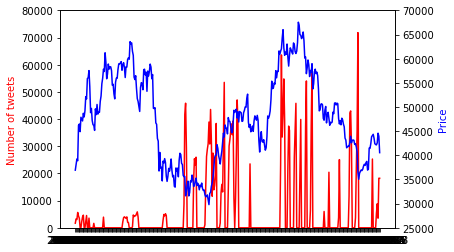

In [198]:
fig, ax = plt.subplots()
ax.plot(result.index,result, color='r')
ax2 = ax.twinx()
ax2.plot(prices.Date,prices.Open, color='b')
ax.set_ylim(0,80000)
ax2.set_ylim(25000,70000)
ax.set_ylabel('Number of tweets', color='r')
ax2.set_ylabel('Price', color='b')
plt.show()

In [200]:
tweets_filled_one = dates_series.combine(date_counts, max, fill_value=1)
log_tweets_number = np.log(tweets_filled_one.values)

In [201]:
log_series = pd.Series(data= log_tweets_number, index=result.index)

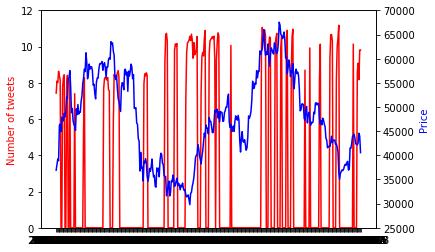

In [206]:
fig, ax = plt.subplots()
ax.plot(log_series.index,log_series, color='r')
ax2 = ax.twinx()
ax2.plot(prices.Date,prices.Open, color='b')
ax.set_ylim(0,12)
ax2.set_ylim(25000,70000)
ax.set_ylabel('Number of tweets', color='r')
ax2.set_ylabel('Price', color='b')
plt.show()